## Importing packages

In [32]:
import numpy as np
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [26]:
# Download latest version
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

Path to dataset files: /home/timhug/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1


In [27]:
import pandas as pd

# Path to the extracted dataset
file_path = '/home/timhug/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1/train.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data type conversions

In [28]:
df.info()

# From this output we can see that data type conversions are necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [29]:
# Specify categorical and numerical columns
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical_columns = ['Age', 'Flight Distance', 'Inflight wifi service', 
                     'Departure/Arrival time convenient', 'Ease of Online booking', 
                     'Gate location', 'Food and drink', 'Online boarding', 
                     'Seat comfort', 'Inflight entertainment', 'On-board service', 
                     'Leg room service', 'Baggage handling', 'Checkin service', 
                     'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 
                     'Arrival Delay in Minutes']

# Convert data types
df[categorical_columns] = df[categorical_columns].astype('category')  # Convert to categorical
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)    # Ensure numerical data type

# Verify the conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103904 non-null  int64   
 1   id                                 103904 non-null  int64   
 2   Gender                             103904 non-null  category
 3   Customer Type                      103904 non-null  category
 4   Age                                103904 non-null  int64   
 5   Type of Travel                     103904 non-null  category
 6   Class                              103904 non-null  category
 7   Flight Distance                    103904 non-null  int64   
 8   Inflight wifi service              103904 non-null  int64   
 9   Departure/Arrival time convenient  103904 non-null  int64   
 10  Ease of Online booking             103904 non-null  int64   
 11  Gate location             

##### Note: 
The following columns represent passenger satisfaction levels for particular aspects of their journey from 1 being worst to 5 being best.
So essentially, the possible values of 1-5 represent categories. However, the decision has been made to not encode these columns as categorical, as these are ordinal categories. By encoding these columns as integers, it is possible to compute averages and other summary statisitcs in a meaningful way, unlike with non-ordinal categorical columns.


* "Inflight wifi service"
* "Departure/Arrival time convenient"
* "Ease of Online booking",
* "Gate location"
* "Food and drink"
* "Online boarding"
* "Seat comfort" 
* "Inflight entertainment"
* "On-board service"
* "Leg room service"
* "Baggage handling"
* "Check-in service"
* "Inflight service"
* "Cleanliness"

## EDA

In [30]:
df.shape

(103904, 25)

#### EDA: Missing values

In [25]:
# Finding columns with missing values and their counts
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

missing_df = pd.DataFrame({
    "column": missing_columns.index,
    "n_missing": missing_columns.values
})
missing_df

,column,n_missing
0,Arrival Delay in Minutes,310


#### EDA: Categorical Variables (Univariate Analysis)

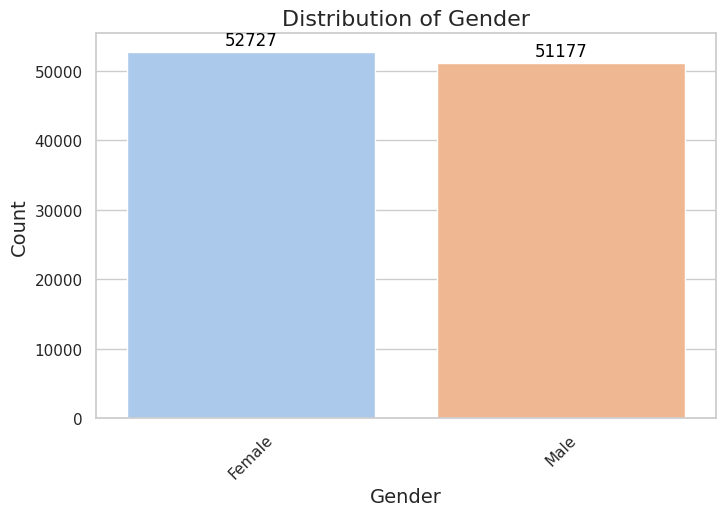

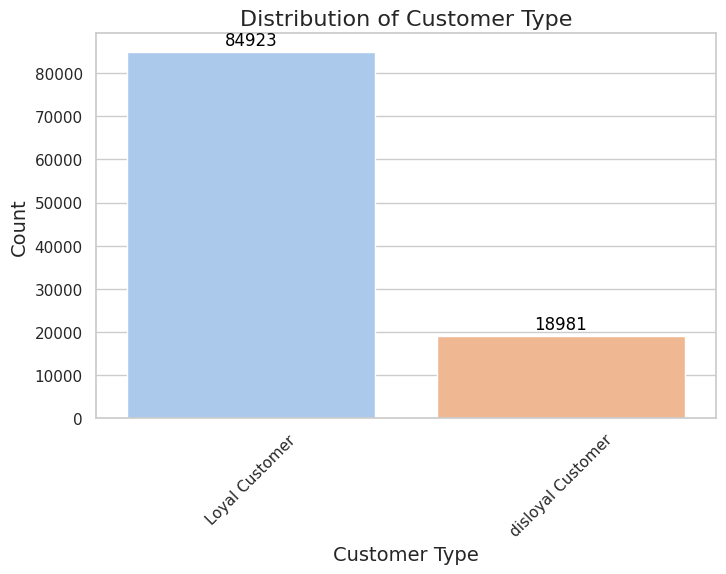

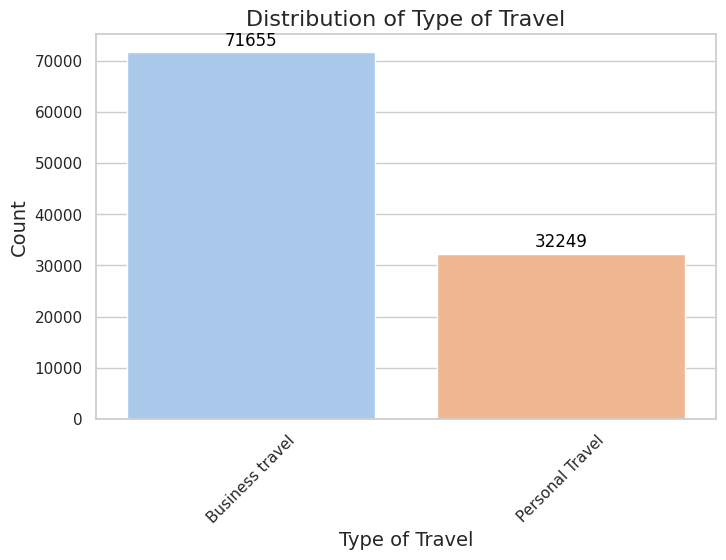

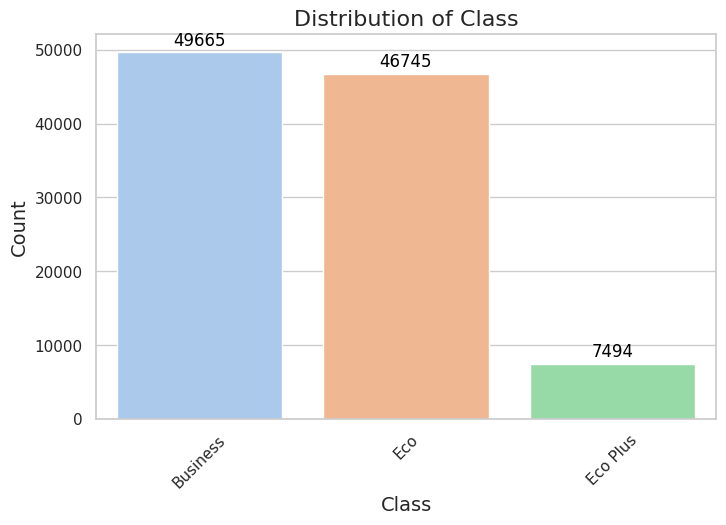

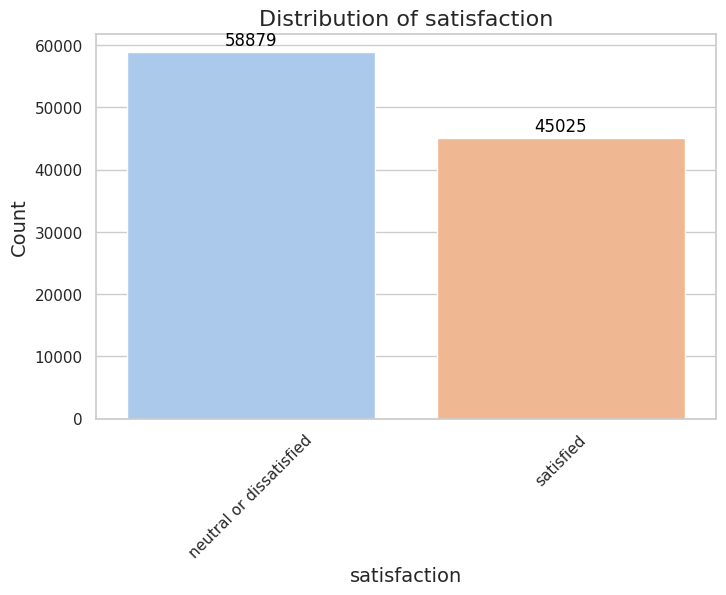

In [33]:
# Univariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Set plot style
sns.set(style="whitegrid")

# Create barplots
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col, hue=col, dodge=False, palette="pastel", legend=False)
    
    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='baseline',
            fontsize=12, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )
    
    # Set titles and labels
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

In [34]:
# Calculate percentage for each category
category_percentages = df['satisfaction'].value_counts(normalize=True) * 100

# Display the result
print("Percentage of observations for each category in 'satisfaction':")
print(category_percentages)

# The target column is weakly imbalanced. This should be taken into consideration for the train test splits, in the modeling step. 

Percentage of observations for each category in 'satisfaction':
satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64


#### EDA: Categorical Variables (Bivariate Analysis, vs target)

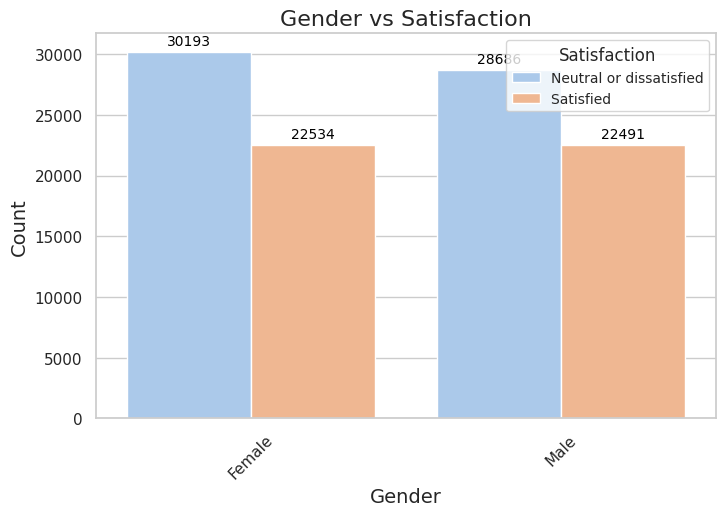

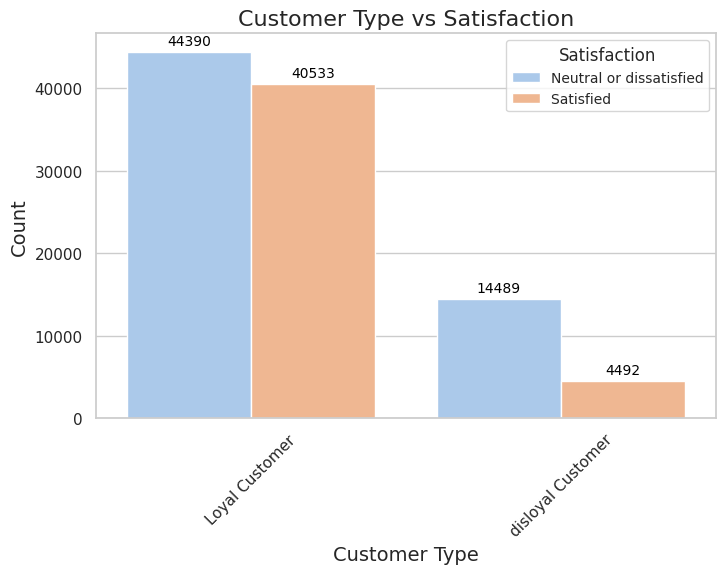

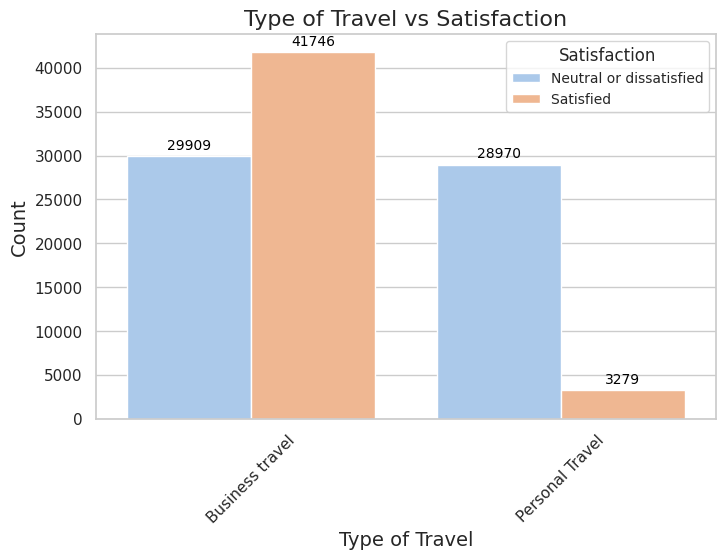

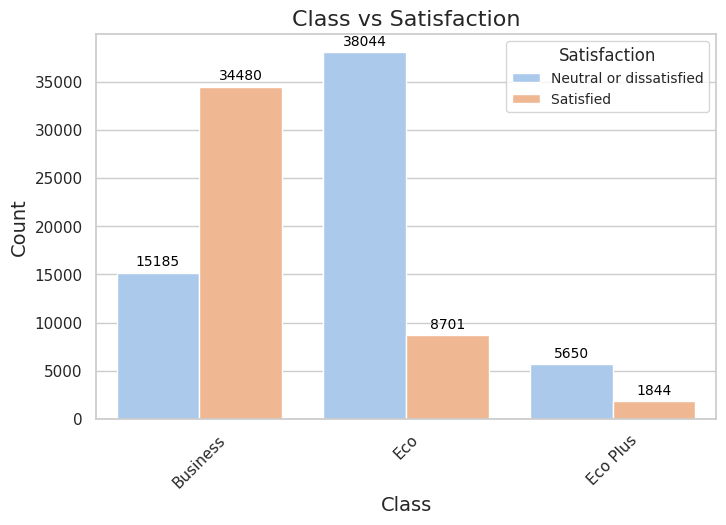

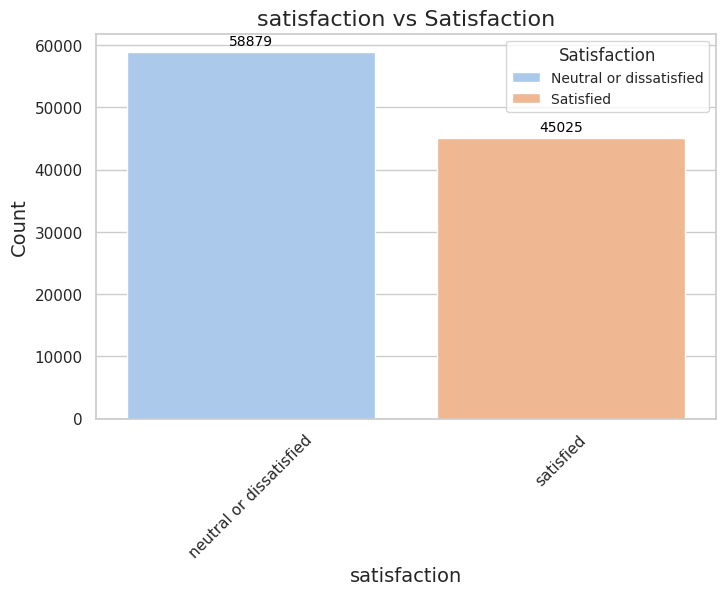

In [36]:

# List of categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create plots for each categorical variable against target (satisfaction column)
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col, hue='satisfaction', palette="pastel")
    
    # Add counts on top of the bars
    for p in ax.patches:
        # Get the height (count) of the bar
        count = int(p.get_height())
        
        # Only annotate if count is greater than 0
        if count > 0:
            ax.annotate(
                f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='baseline',
                fontsize=10, 
                color='black', 
                xytext=(0, 5), 
                textcoords='offset points'
            )
    
    # Customize plot
    plt.title(f'{col} vs Satisfaction', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Satisfaction', labels=['Neutral or dissatisfied', 'Satisfied '], fontsize=10)
    plt.xticks(rotation=45)
    plt.show()

#### EDA: Numerical Variables

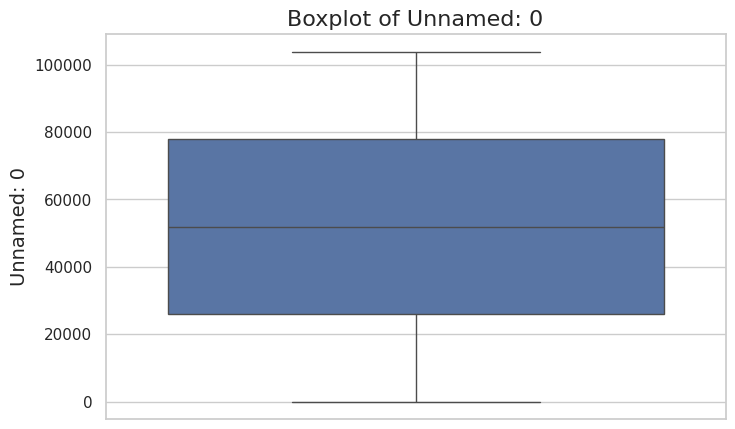

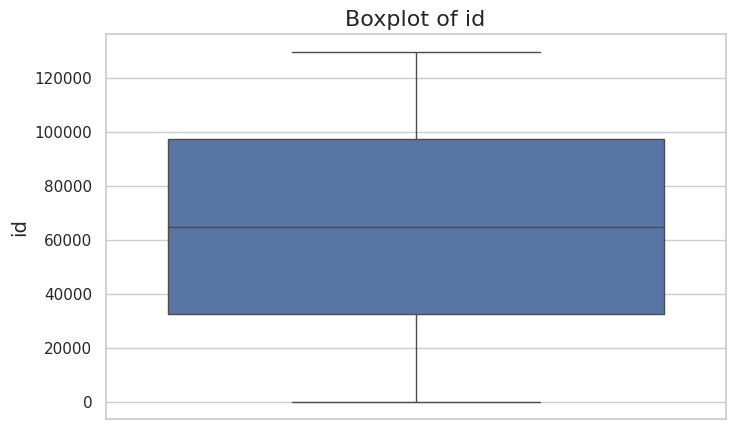

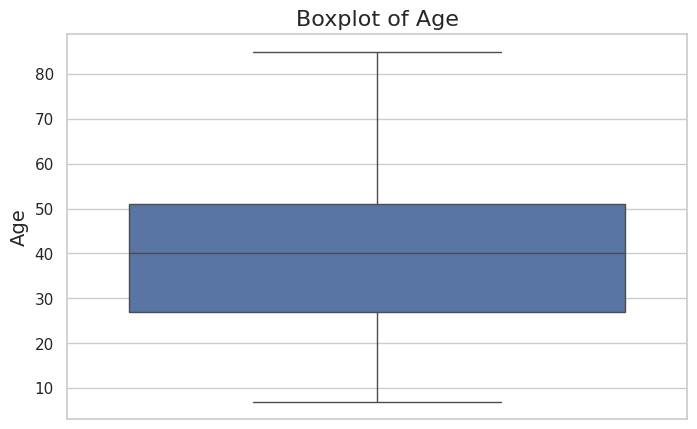

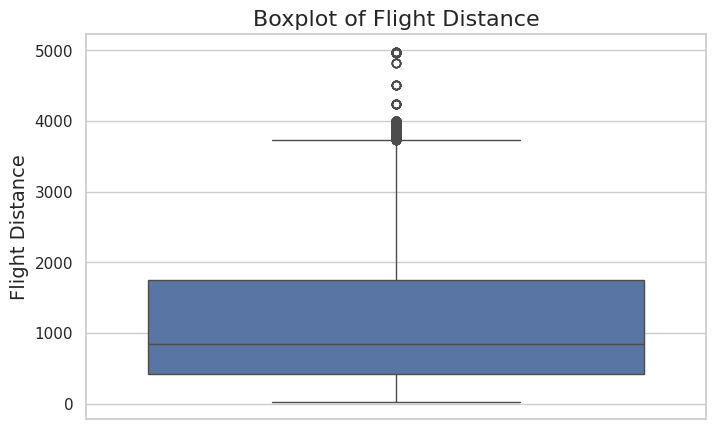

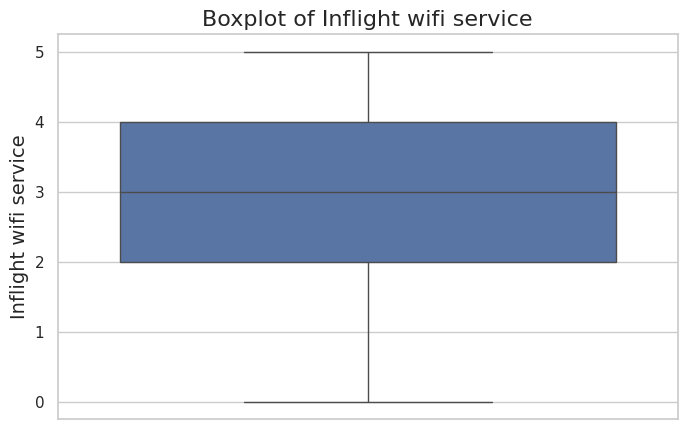

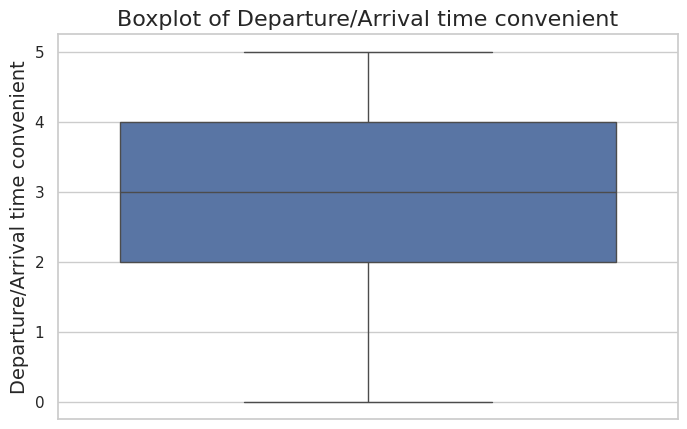

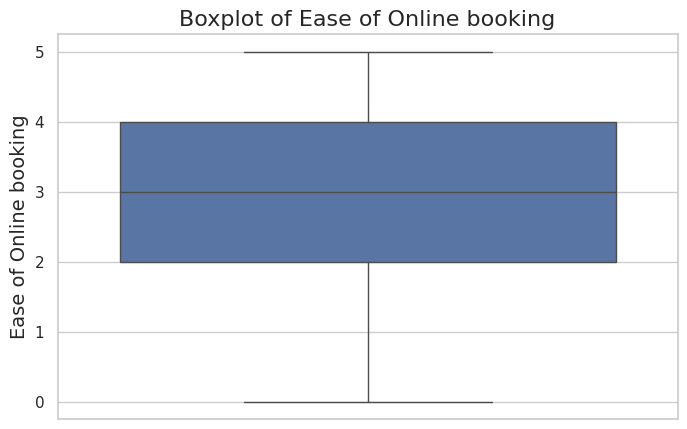

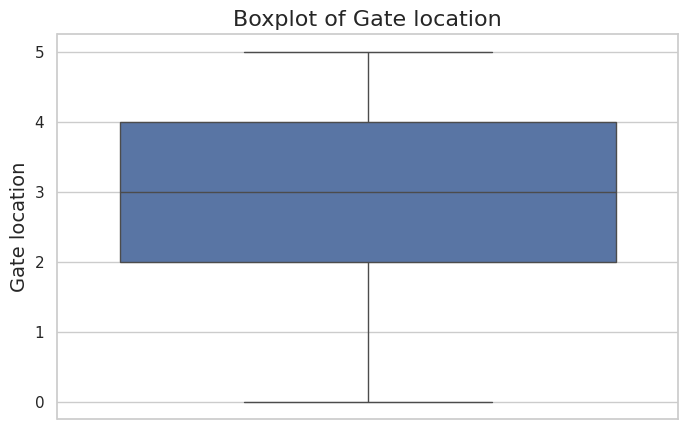

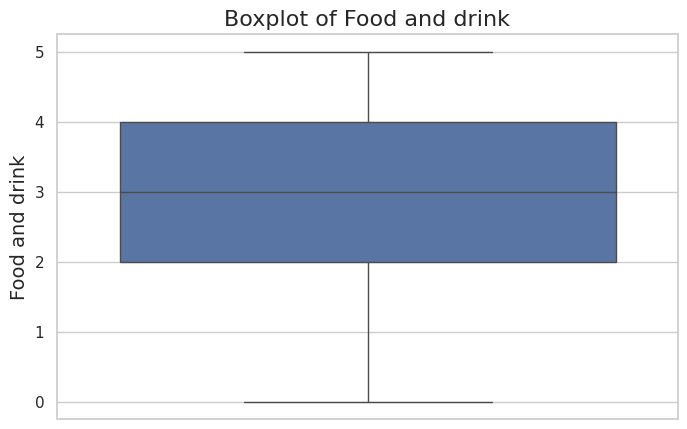

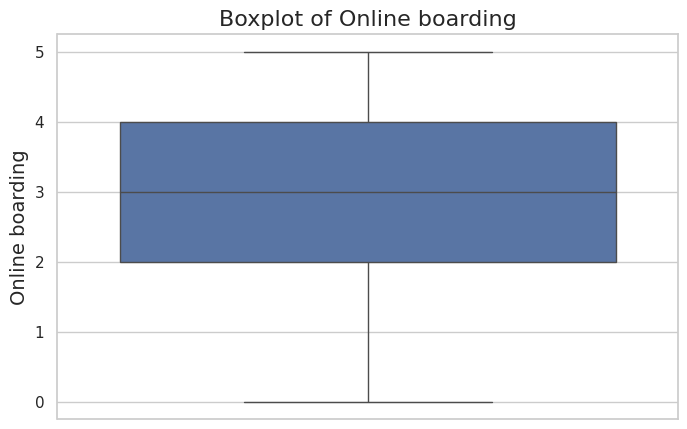

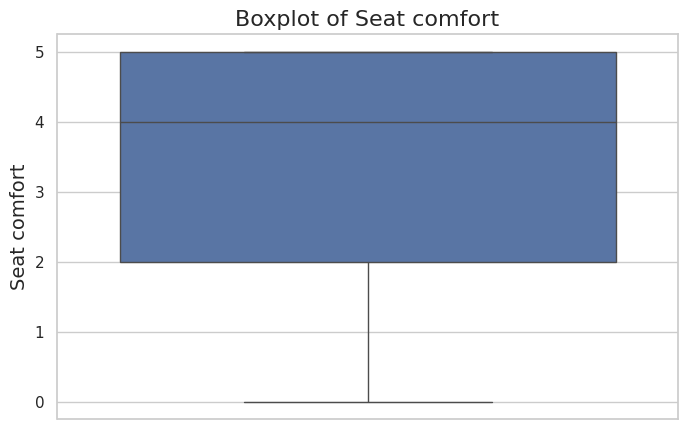

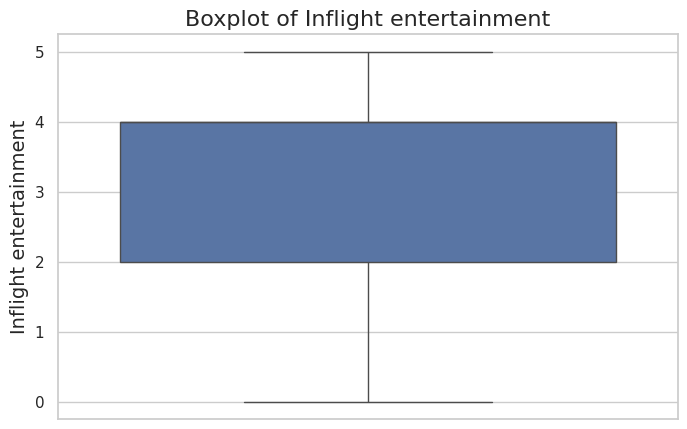

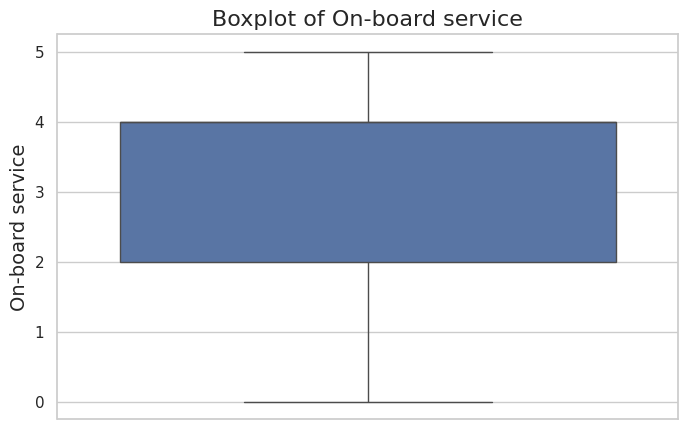

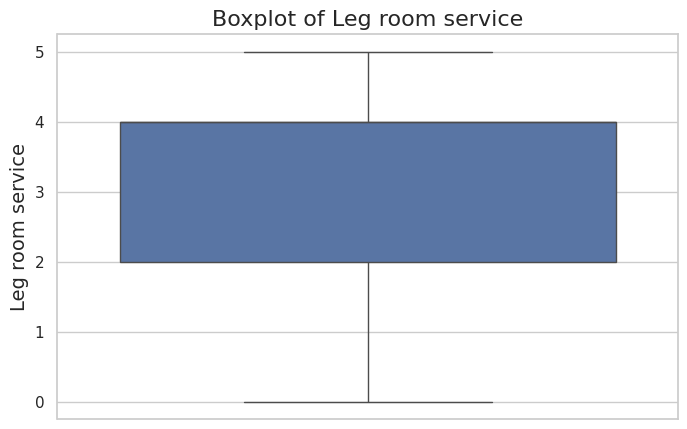

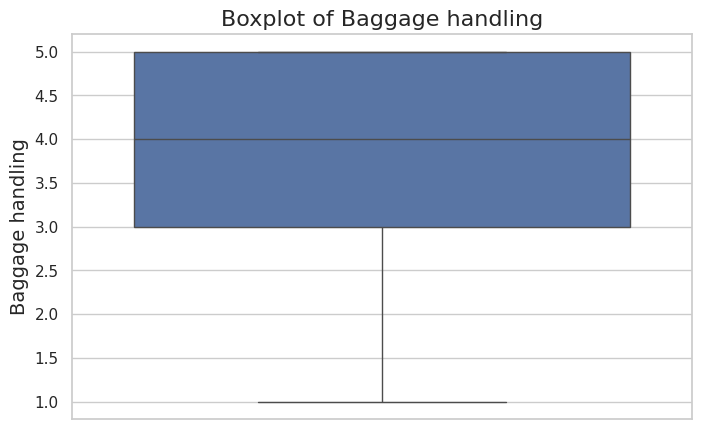

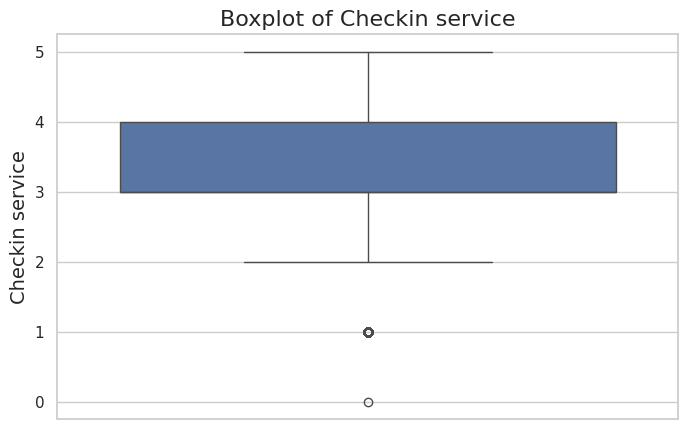

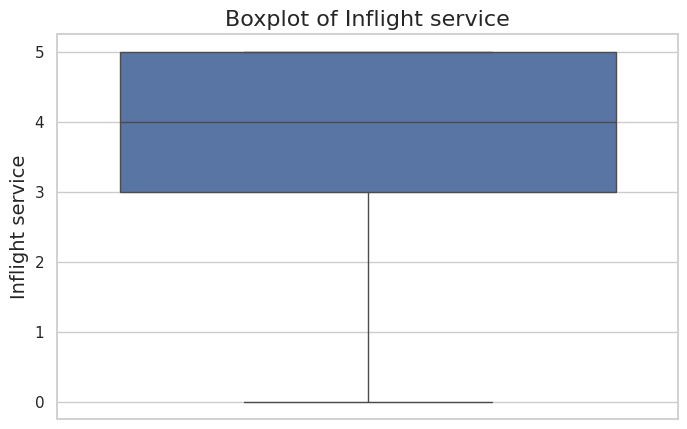

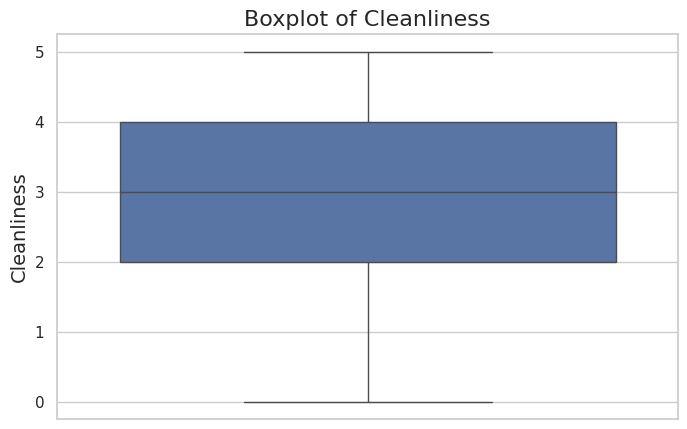

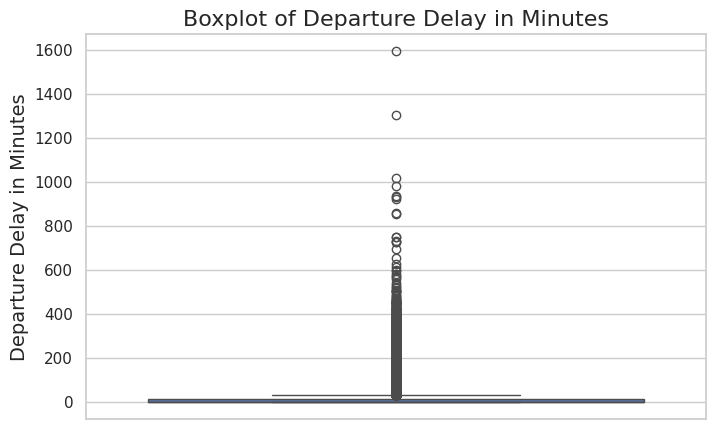

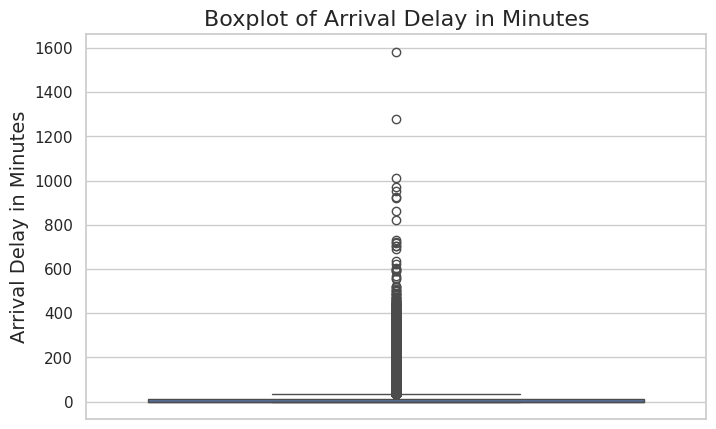

In [37]:
# Univariate analysis for numerical variables: Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col)
    
    # Set titles and labels
    plt.title(f'Boxplot of {col}', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('')
    plt.show()

## Data Cleaning & Preprocessing
* Handle missing values
* Omitting columns not needed for modeling